## Importing Libraries

In [9]:
import pandas as pd
import os
import sys
os.makedirs("/Users/aalaaseif/Documents/ITI/Machine Learning 2/Final Project/results", exist_ok=True)
sys.path.append(os.path.abspath("/Users/aalaaseif/Documents/ITI/Machine Learning 2/Final Project/src"))
from feature_extraction import extract_features  
from clustering import apply_kmeans
from preprocessing import preprocess_text
from preprocessing import preprocess_dataframe
from evaluation import evaluate_clustering
from visualization import visualize_clusters
from sklearn.datasets import fetch_20newsgroups

## Reading data

In [10]:
# we can change the dataset name here 
dataset_name = "20_newsgroups"
if dataset_name == "people_wiki":
    df = pd.read_csv("/Users/aalaaseif/Documents/ITI/Machine Learning 2/Final Project/Data/people_wiki.csv")  
elif dataset_name == "20_newsgroups":
    newsgroups = fetch_20newsgroups(subset='all', remove=('headers', 'footers', 'quotes'))
    df = pd.DataFrame({'text': newsgroups.data}) 

## preprocessing

In [11]:
df = preprocess_dataframe(df)

## feature extraction

In [12]:
tfidf_features, vectorizer = extract_features(df['clean_text'])

## Apply K-Means clustering

In [13]:
k = 5
cluster_labels, kmeans_model = apply_kmeans(tfidf_features, k)
df['cluster'] = cluster_labels

## Evaluate clustering

In [14]:
silhouette = evaluate_clustering(cluster_labels, tfidf_features)
print(f"Silhouette Score: {silhouette}")

Silhouette Score: 0.0095
Silhouette Score: 0.009510956717990059


## Visualize clusters

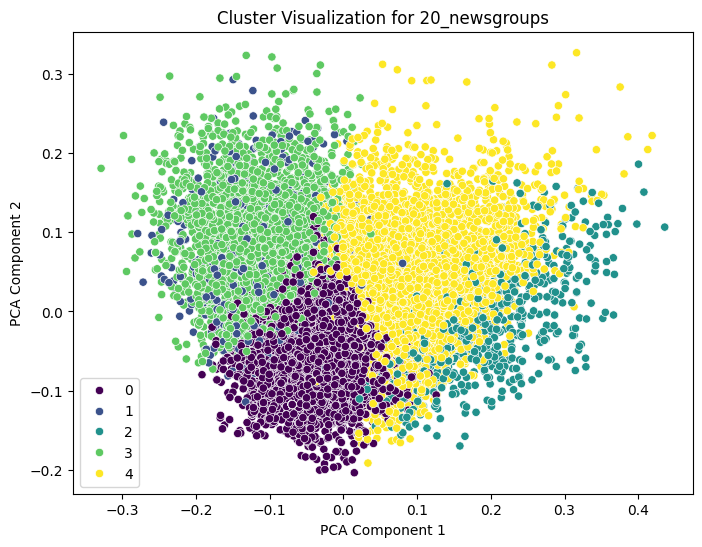

In [15]:
visualize_clusters(tfidf_features, cluster_labels, dataset_name)

## save

In [16]:
df.to_csv(f"../Data/cleaned_{dataset_name}.csv", index=False)
df.to_csv(f"../Data/clustered_{dataset_name}.csv", index=False)

with open("../results/evaluation.txt", "w") as f:
    f.write(f"Silhouette Score: {silhouette:.4f}\n")